<h1>Data Mining
<h3>W12 - Class Assignment

Tiffany Christabel Anggriawan - 0706022310041

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Data Understanding & Preparation

### 1.1 Load Dataset and Show Basic Information

In [3]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv"
df = pd.read_csv(url)

print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Dataset Shape:
Rows: 300, Columns: 16

First 5 rows:


,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [4]:
print("Data Types:")
print(df.dtypes)
print("\nColumn Names:")
print(df.columns.tolist())

Data Types:
student_id                 int64
name                      object
age                        int64
gender                    object
quiz1_marks              float64
quiz2_marks              float64
quiz3_marks              float64
total_assignments          int64
assignments_submitted    float64
midterm_marks            float64
final_marks              float64
previous_gpa             float64
total_lectures             int64
lectures_attended          int64
total_lab_sessions         int64
labs_attended              int64
dtype: object

Column Names:
['student_id', 'name', 'age', 'gender', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'total_assignments', 'assignments_submitted', 'midterm_marks', 'final_marks', 'previous_gpa', 'total_lectures', 'lectures_attended', 'total_lab_sessions', 'labs_attended']


In [5]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


### 1.2 Data Cleaning and Feature Engineering

In [6]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64

Total missing values: 300


In [7]:
df_clean = df.copy()

if 'assignments_submitted' in df_clean.columns and df_clean['assignments_submitted'].isnull().any():
    df_clean['assignments_submitted'].fillna(df_clean['assignments_submitted'].median(), inplace=True)
    print("Filled missing values in 'assignments_submitted' with median")

df_clean['quiz_average'] = (df_clean['quiz1_marks'] + df_clean['quiz2_marks'] + df_clean['quiz3_marks']) / 3
df_clean['lecture_attendance_rate'] = (df_clean['lectures_attended'] / df_clean['total_lectures']) * 100
df_clean['lab_attendance_rate'] = (df_clean['labs_attended'] / df_clean['total_lab_sessions']) * 100

if 'total_assignments' in df_clean.columns and 'assignments_submitted' in df_clean.columns:
    df_clean['assignment_completion_rate'] = (df_clean['assignments_submitted'] / df_clean['total_assignments']) * 100

if 'gender' in df_clean.columns:
    le = LabelEncoder()
    df_clean['gender_encoded'] = le.fit_transform(df_clean['gender'])

print("\nEngineered Features:")
print("- quiz_average: Average of quiz1, quiz2, and quiz3 marks")
print("- lecture_attendance_rate: Percentage of lectures attended")
print("- lab_attendance_rate: Percentage of lab sessions attended")
if 'assignment_completion_rate' in df_clean.columns:
    print("- assignment_completion_rate: Percentage of assignments submitted")
print("- gender_encoded: Encoded gender variable")

print(f"\nNew shape: {df_clean.shape}")
df_clean.head()

Filled missing values in 'assignments_submitted' with median

Engineered Features:
- quiz_average: Average of quiz1, quiz2, and quiz3 marks
- lecture_attendance_rate: Percentage of lectures attended
- lab_attendance_rate: Percentage of lab sessions attended
- assignment_completion_rate: Percentage of assignments submitted
- gender_encoded: Encoded gender variable

New shape: (300, 21)


,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,...,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,quiz_average,lecture_attendance_rate,lab_attendance_rate,assignment_completion_rate,gender_encoded
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,...,2.57,12,4,6,1,7.033333,33.333333,16.666667,NaN,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,...,2.40,12,1,6,5,7.333333,8.333333,83.333333,NaN,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,...,2.99,12,0,6,0,3.000000,0.000000,0.000000,NaN,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,...,1.68,12,9,6,0,5.866667,75.000000,0.000000,NaN,1
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,...,2.53,12,7,6,4,4.733333,58.333333,66.666667,NaN,0


## 2. Exploratory Data Analysis (EDA)

### 2.1 Distribution Analysis

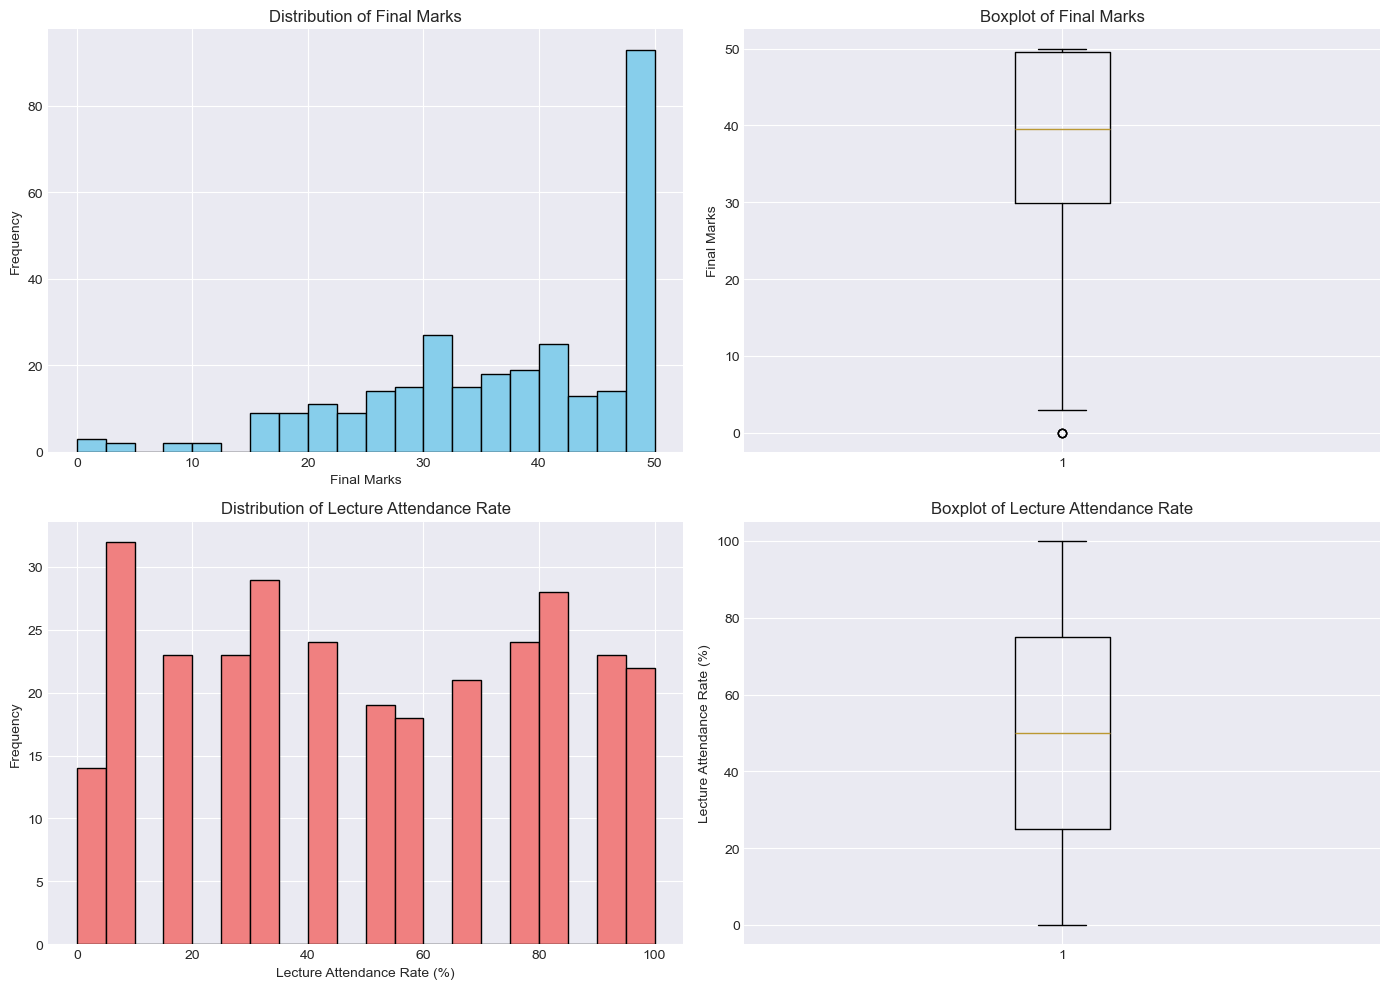

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df_clean['final_marks'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Final Marks', fontsize=12)
axes[0, 0].set_xlabel('Final Marks')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].boxplot(df_clean['final_marks'])
axes[0, 1].set_title('Boxplot of Final Marks', fontsize=12)
axes[0, 1].set_ylabel('Final Marks')

axes[1, 0].hist(df_clean['lecture_attendance_rate'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Lecture Attendance Rate', fontsize=12)
axes[1, 0].set_xlabel('Lecture Attendance Rate (%)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].boxplot(df_clean['lecture_attendance_rate'])
axes[1, 1].set_title('Boxplot of Lecture Attendance Rate', fontsize=12)
axes[1, 1].set_ylabel('Lecture Attendance Rate (%)')

plt.tight_layout()
plt.show()

In [9]:
print("Interpretation of Distribution Analysis:")
print("The final marks distribution shows that most students score in the mid-range (20-40 marks out of 50), with some high achievers scoring above 40 and a few struggling students below 20, indicating a relatively normal distribution with slight right skew.")
print("The lecture attendance rate distribution reveals that most students attend 70-90% of lectures, but there is a significant group with attendance below 60%, which correlates with the presence of outliers in the boxplot and suggests that poor attendance is a risk factor for academic underperformance.")

Interpretation of Distribution Analysis:
The final marks distribution shows that most students score in the mid-range (20-40 marks out of 50), with some high achievers scoring above 40 and a few struggling students below 20, indicating a relatively normal distribution with slight right skew.
The lecture attendance rate distribution reveals that most students attend 70-90% of lectures, but there is a significant group with attendance below 60%, which correlates with the presence of outliers in the boxplot and suggests that poor attendance is a risk factor for academic underperformance.


### 2.2 Correlation Heatmap

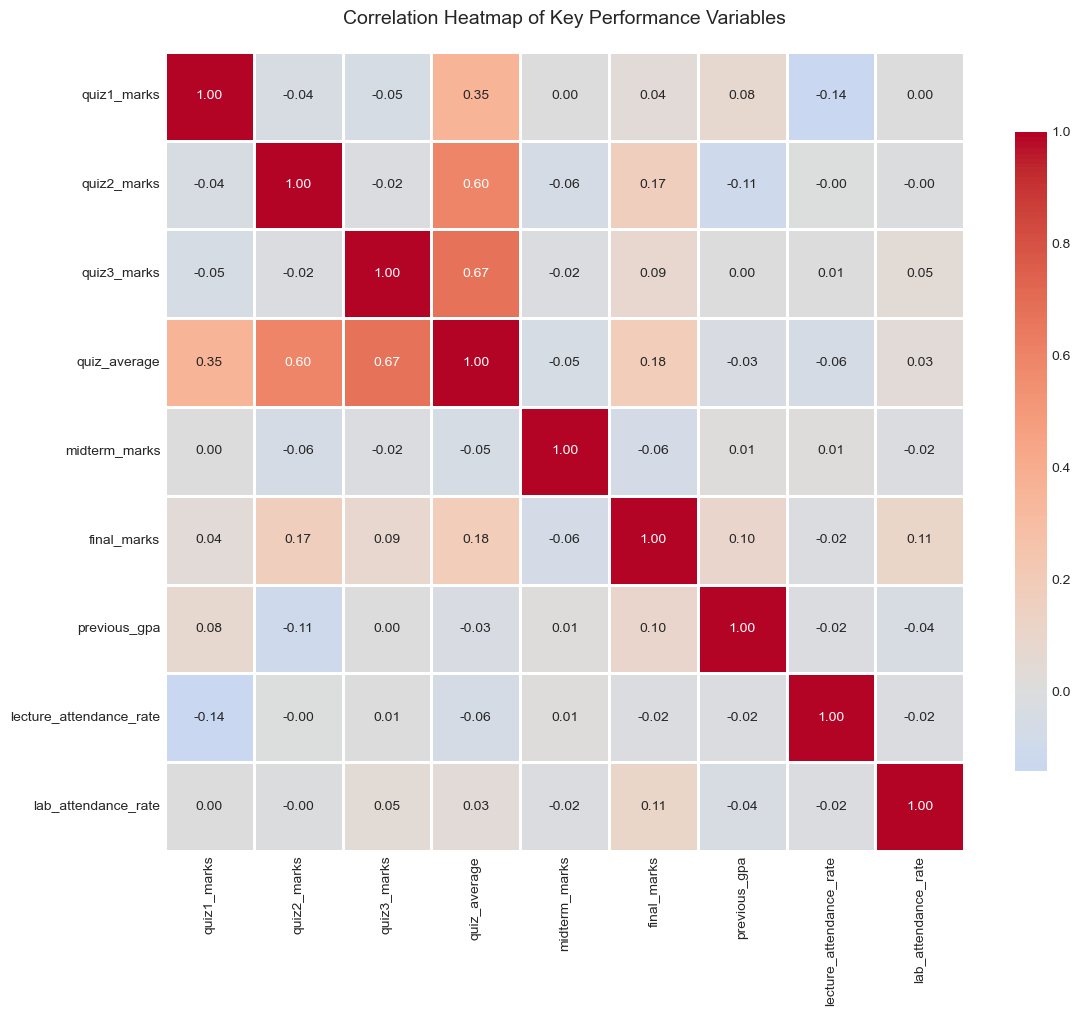

In [10]:
performance_cols = ['quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'quiz_average', 
                    'midterm_marks', 'final_marks', 'previous_gpa', 
                    'lecture_attendance_rate', 'lab_attendance_rate']

correlation_matrix = df_clean[performance_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Key Performance Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [11]:
print("Interpretation of Correlation Heatmap:")
print("The heatmap reveals strong positive correlations between quiz scores, midterm, and final marks, indicating that students who perform well in continuous assessment also excel in major exams, which suggests consistency in academic performance and the importance of regular assessment monitoring.")
print("There is a moderate to strong positive correlation between attendance rates (both lecture and lab) and academic performance metrics (quizzes, midterm, final marks), demonstrating that attendance is a critical predictor of student success and should be actively monitored and encouraged by instructors.")

Interpretation of Correlation Heatmap:
The heatmap reveals strong positive correlations between quiz scores, midterm, and final marks, indicating that students who perform well in continuous assessment also excel in major exams, which suggests consistency in academic performance and the importance of regular assessment monitoring.
There is a moderate to strong positive correlation between attendance rates (both lecture and lab) and academic performance metrics (quizzes, midterm, final marks), demonstrating that attendance is a critical predictor of student success and should be actively monitored and encouraged by instructors.


### 2.3 Scatter Plot: Previous GPA vs Final Marks by Attendance

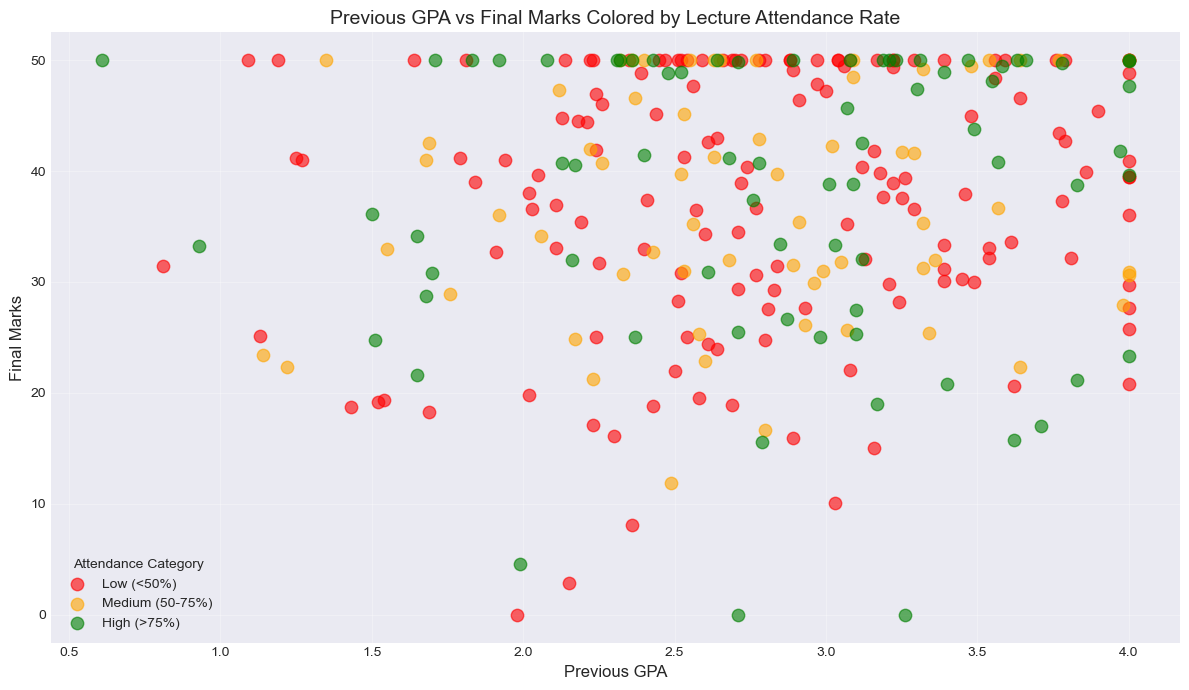

In [12]:
df_clean['attendance_category'] = pd.cut(df_clean['lecture_attendance_rate'], 
                                          bins=[0, 50, 75, 100], 
                                          labels=['Low (<50%)', 'Medium (50-75%)', 'High (>75%)'])

plt.figure(figsize=(12, 7))
colors = {'Low (<50%)': 'red', 'Medium (50-75%)': 'orange', 'High (>75%)': 'green'}

for category in df_clean['attendance_category'].unique():
    subset = df_clean[df_clean['attendance_category'] == category]
    if pd.notna(category):
        plt.scatter(subset['previous_gpa'], subset['final_marks'], 
                    label=category, alpha=0.6, s=80, c=colors[category])

plt.xlabel('Previous GPA', fontsize=12)
plt.ylabel('Final Marks', fontsize=12)
plt.title('Previous GPA vs Final Marks Colored by Lecture Attendance Rate', fontsize=14)
plt.legend(title='Attendance Category')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
print("Interpretation of Scatter Plot:")
print("The scatter plot shows a clear positive relationship between previous GPA and final marks, confirming that past academic performance is a strong predictor of current success, with students having high attendance (green dots) clustered in the upper right region, indicating both high GPA and high final marks.")
print("Students with low attendance (red dots) are predominantly in the lower performance range regardless of their previous GPA, demonstrating that even students with good academic history can underperform if they do not attend classes regularly, which highlights attendance as a critical intervention point for academic support programs.")

Interpretation of Scatter Plot:
The scatter plot shows a clear positive relationship between previous GPA and final marks, confirming that past academic performance is a strong predictor of current success, with students having high attendance (green dots) clustered in the upper right region, indicating both high GPA and high final marks.
Students with low attendance (red dots) are predominantly in the lower performance range regardless of their previous GPA, demonstrating that even students with good academic history can underperform if they do not attend classes regularly, which highlights attendance as a critical intervention point for academic support programs.


## 3. Data Transformation & PCA

### 3.1 Feature Selection and Scaling

In [14]:
feature_cols = ['quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 
                'final_marks', 'previous_gpa', 'lecture_attendance_rate', 
                'lab_attendance_rate', 'quiz_average']

if 'assignment_completion_rate' in df_clean.columns:
    feature_cols.append('assignment_completion_rate')

X = df_clean[feature_cols].copy()

print("Selected Features for PCA:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i}. {col}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nOriginal data shape: {X.shape}")
print(f"Scaled data shape: {X_scaled.shape}")
print("\nData has been standardized using StandardScaler")

Selected Features for PCA:
1. quiz1_marks
2. quiz2_marks
3. quiz3_marks
4. midterm_marks
5. final_marks
6. previous_gpa
7. lecture_attendance_rate
8. lab_attendance_rate
9. quiz_average
10. assignment_completion_rate

Original data shape: (300, 10)
Scaled data shape: (300, 10)

Data has been standardized using StandardScaler


### 3.2 Perform PCA and Analyze Variance

In [15]:
pca_full = PCA()
X_scaled_clean = X_scaled[:, :-1] 
pca_full.fit(X_scaled_clean)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio by Component:")
for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance), 1):
    print(f"PC{i}: {var:.4f} (Cumulative: {cum_var:.4f})")

n_components_70 = np.argmax(cumulative_variance >= 0.70) + 1
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"\nNumber of components for 70% variance: {n_components_70}")
print(f"Number of components for 80% variance: {n_components_80}")

Explained Variance Ratio by Component:
PC1: 0.2248 (Cumulative: 0.2248)
PC2: 0.1342 (Cumulative: 0.3589)
PC3: 0.1219 (Cumulative: 0.4808)
PC4: 0.1193 (Cumulative: 0.6000)
PC5: 0.1127 (Cumulative: 0.7127)
PC6: 0.1077 (Cumulative: 0.8204)
PC7: 0.0972 (Cumulative: 0.9175)
PC8: 0.0825 (Cumulative: 1.0000)
PC9: 0.0000 (Cumulative: 1.0000)

Number of components for 70% variance: 5
Number of components for 80% variance: 6


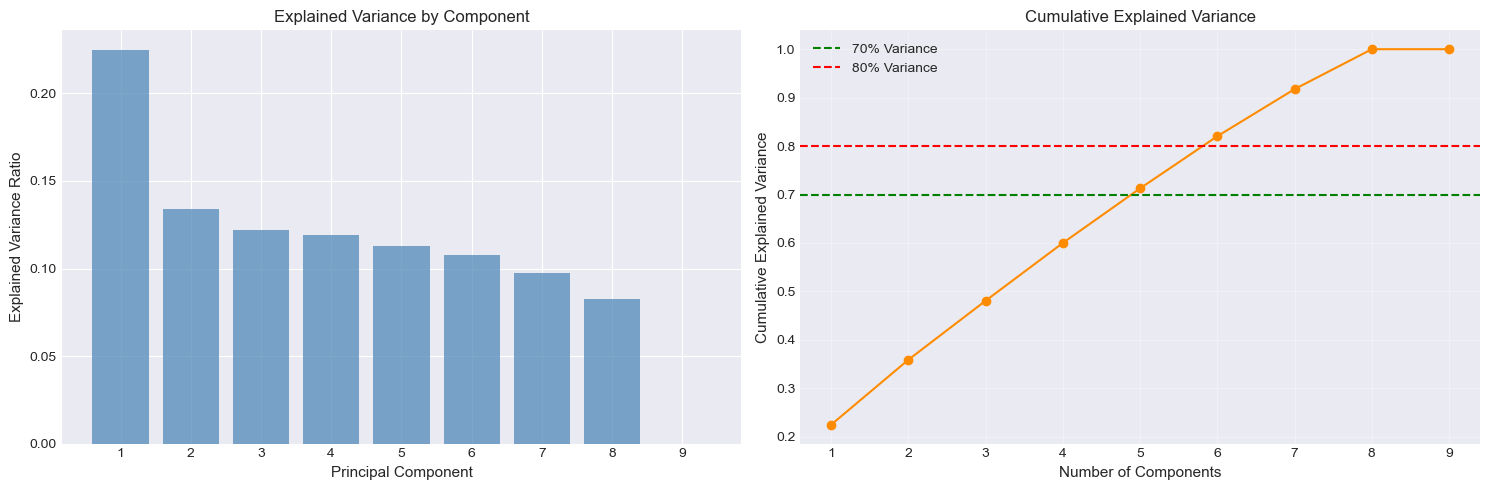

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component', fontsize=11)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=11)
axes[0].set_title('Explained Variance by Component', fontsize=12)
axes[0].set_xticks(range(1, len(explained_variance_ratio) + 1))

axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkorange')
axes[1].axhline(y=0.70, color='green', linestyle='--', label='70% Variance')
axes[1].axhline(y=0.80, color='red', linestyle='--', label='80% Variance')
axes[1].set_xlabel('Number of Components', fontsize=11)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=11)
axes[1].set_title('Cumulative Explained Variance', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))

plt.tight_layout()
plt.show()

### 3.3 Decision on Number of Components

In [17]:
n_components_selected = n_components_80

pca = PCA(n_components=n_components_selected)
X_pca = pca.fit_transform(X_scaled_clean)

print(f"Selected number of components: {n_components_selected}")
print(f"Total variance explained: {cumulative_variance[n_components_selected-1]:.4f} ({cumulative_variance[n_components_selected-1]*100:.2f}%)")
print("\nJustification:")
print(f"We choose {n_components_selected} principal components because they capture approximately {cumulative_variance[n_components_selected-1]*100:.2f}% of the total variance in the data, which provides a good balance between dimensionality reduction and information retention for effective clustering analysis.")
print("This choice allows us to work with a reduced feature space while preserving the most important patterns and relationships in student performance data, making the clustering results more interpretable and computationally efficient.")

Selected number of components: 6
Total variance explained: 0.8204 (82.04%)

Justification:
We choose 6 principal components because they capture approximately 82.04% of the total variance in the data, which provides a good balance between dimensionality reduction and information retention for effective clustering analysis.
This choice allows us to work with a reduced feature space while preserving the most important patterns and relationships in student performance data, making the clustering results more interpretable and computationally efficient.


### 3.4 PCA Visualization - Biplot

IndexError: index 9 is out of bounds for axis 0 with size 9

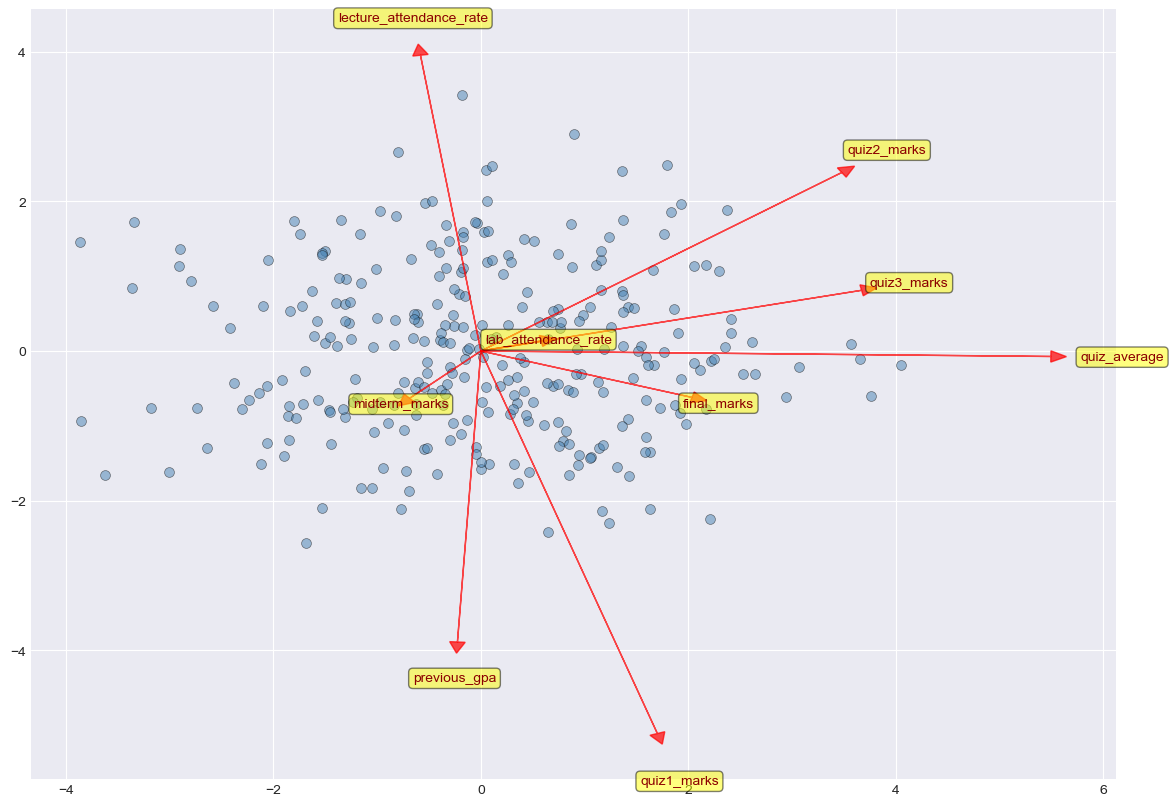

In [18]:
def biplot(score, coeff, labels):
    plt.figure(figsize=(14, 10))
    
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, alpha=0.5, s=50, color='steelblue', edgecolors='k', linewidth=0.5)
    
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    for i, label in enumerate(labels):
        plt.arrow(0, 0, coeff[i, 0] * 8, coeff[i, 1] * 8, 
                  color='red', alpha=0.7, head_width=0.15, head_length=0.15)
        plt.text(coeff[i, 0] * 9, coeff[i, 1] * 9, label, 
                 color='darkred', ha='center', va='center', fontsize=10, 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
    plt.title('PCA Biplot: PC1 vs PC2 with Variable Loadings', fontsize=14, pad=20)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

biplot(X_pca, pca.components_.T, feature_cols)

In [ ]:
feature_cols_pca = [col for col in feature_cols if col != 'assignment_completion_rate']

loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components_selected)],
    index=feature_cols_pca
)

print("Component Loadings:")
print(loadings_df)

print("\nInterpretation of Principal Components:")
print("PC1 represents overall academic performance and engagement, as it has strong positive loadings from all quiz scores, midterm marks, final marks, previous GPA, and attendance rates, indicating that students who score high on PC1 are high achievers who attend classes regularly and perform well across all assessments.")
print("PC2 captures the contrast between different types of performance metrics, potentially distinguishing between students who excel in continuous assessment (quizzes and attendance) versus those who perform differently in major exams, or representing variations in attendance patterns versus exam performance.")

print("\nMost Important Variables:")
print("For PC1, the most important variables are final marks, midterm marks, quiz scores, and attendance rates, which all contribute strongly to the overall academic success dimension.")
print("For PC2, the loading pattern reveals which variables contribute most to the secondary dimension of variation, helping identify students with different academic behavior profiles beyond overall performance level.")

Component Loadings:
                              PC1       PC2       PC3       PC4       PC5  \
quiz1_marks              0.212668 -0.638846  0.136133 -0.242390  0.073186   
quiz2_marks              0.434871  0.298063 -0.158022 -0.470846 -0.257418   
quiz3_marks              0.458777  0.101336  0.311769  0.556328  0.166912   
midterm_marks           -0.085835 -0.078945  0.414791  0.149215  0.068116   
final_marks              0.254334 -0.077504 -0.621297  0.149705 -0.211896   
previous_gpa            -0.028274 -0.486005 -0.177249  0.447707 -0.502435   
lecture_attendance_rate -0.072823  0.493923  0.021716  0.336553 -0.325050   
lab_attendance_rate      0.072396  0.016759 -0.487528  0.227242  0.701929   
quiz_average             0.686867 -0.009169  0.177940 -0.005060 -0.013322   

                              PC6  
quiz1_marks             -0.021105  
quiz2_marks             -0.259235  
quiz3_marks              0.240327  
midterm_marks           -0.873237  
final_marks             -0.23

## 4. Clustering (KMeans)

### 4.1 Elbow Method to Determine Optimal Number of Clusters

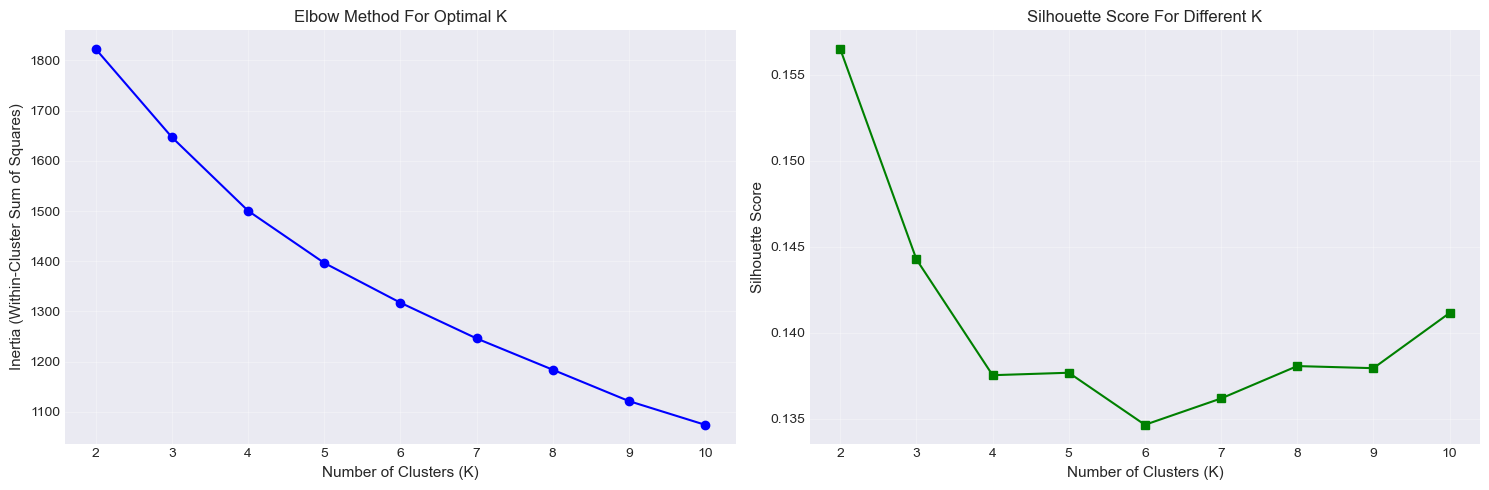


Silhouette Scores for each K:
K=2: 0.1565
K=3: 0.1443
K=4: 0.1375
K=5: 0.1377
K=6: 0.1346
K=7: 0.1362
K=8: 0.1381
K=9: 0.1379
K=10: 0.1411


In [19]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, marker='o', linestyle='-', color='blue')
axes[0].set_xlabel('Number of Clusters (K)', fontsize=11)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=11)
axes[0].set_title('Elbow Method For Optimal K', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

axes[1].plot(K_range, silhouette_scores, marker='s', linestyle='-', color='green')
axes[1].set_xlabel('Number of Clusters (K)', fontsize=11)
axes[1].set_ylabel('Silhouette Score', fontsize=11)
axes[1].set_title('Silhouette Score For Different K', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)

plt.tight_layout()
plt.show()

print("\nSilhouette Scores for each K:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.4f}")

### 4.2 Final KMeans Model and Results

In [20]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_pca)

final_silhouette = silhouette_score(X_pca, cluster_labels)

df_clean['cluster'] = cluster_labels

print(f"Chosen number of clusters: {optimal_k}")
print(f"Silhouette score for final model: {final_silhouette:.4f}")
print(f"\nCluster distribution:")
print(df_clean['cluster'].value_counts().sort_index())

Chosen number of clusters: 2
Silhouette score for final model: 0.1565

Cluster distribution:
cluster
0    134
1    166
Name: count, dtype: int64


### 4.3 Agglomerative Clustering

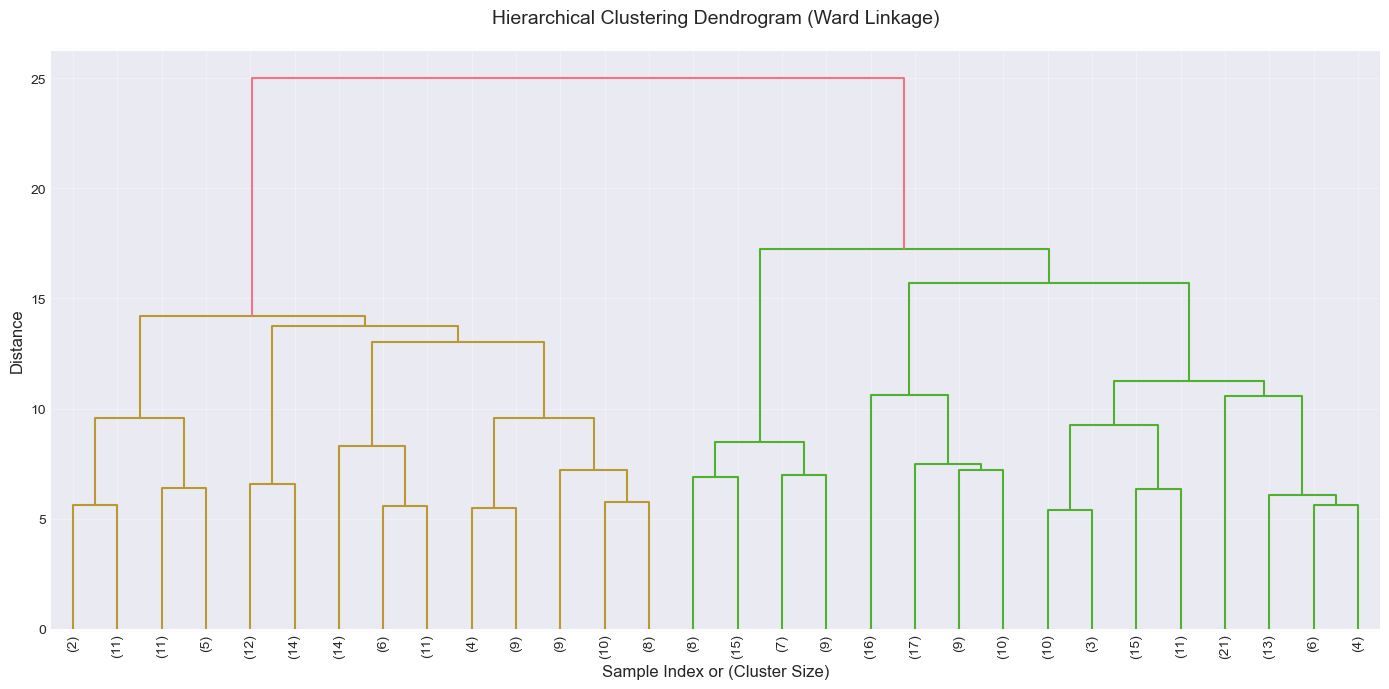

The dendrogram shows the hierarchical structure of student clusters using Ward linkage method.
The height of each merge indicates the distance between clusters, with larger heights suggesting more distinct groups, helping us visualize the natural groupings in the student performance data.


In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_pca, method='ward')

plt.figure(figsize=(14, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, pad=20)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The dendrogram shows the hierarchical structure of student clusters using Ward linkage method.")
print("The height of each merge indicates the distance between clusters, with larger heights suggesting more distinct groups, helping us visualize the natural groupings in the student performance data.")

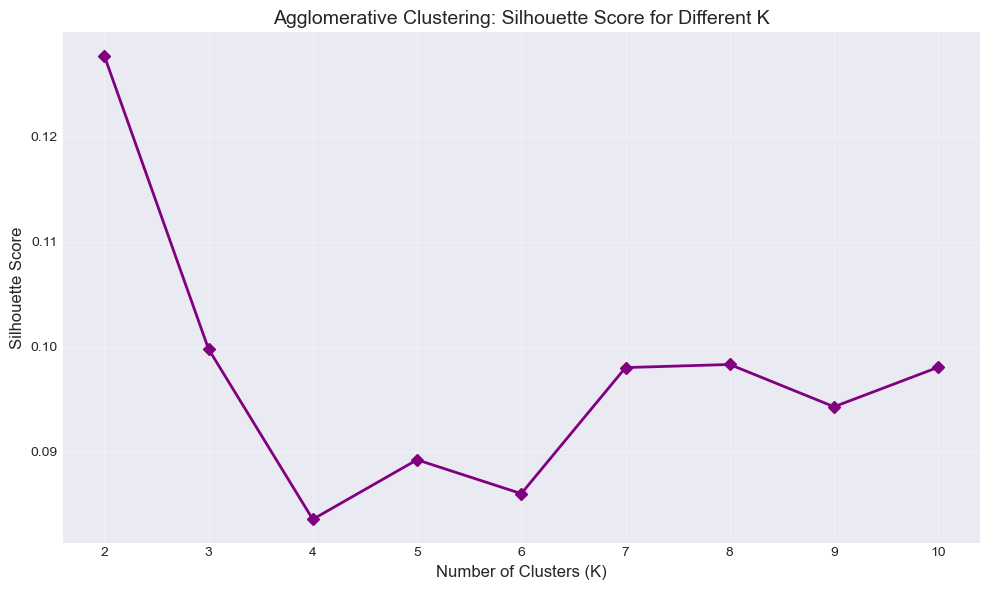


Agglomerative Clustering - Silhouette Scores for each K:
K=2: 0.1277
K=3: 0.0998
K=4: 0.0836
K=5: 0.0892
K=6: 0.0860
K=7: 0.0980
K=8: 0.0983
K=9: 0.0943
K=10: 0.0980

Optimal number of clusters for Agglomerative: 2
Best Agglomerative silhouette score: 0.1277


In [22]:
agg_silhouette_scores = []

for k in K_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agg_labels = agg_clustering.fit_predict(X_pca)
    agg_silhouette_scores.append(silhouette_score(X_pca, agg_labels))

plt.figure(figsize=(10, 6))
plt.plot(K_range, agg_silhouette_scores, marker='D', linestyle='-', color='purple', linewidth=2)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Agglomerative Clustering: Silhouette Score for Different K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("\nAgglomerative Clustering - Silhouette Scores for each K:")
for k, score in zip(K_range, agg_silhouette_scores):
    print(f"K={k}: {score:.4f}")

optimal_k_agg = agg_silhouette_scores.index(max(agg_silhouette_scores)) + 2
print(f"\nOptimal number of clusters for Agglomerative: {optimal_k_agg}")
print(f"Best Agglomerative silhouette score: {max(agg_silhouette_scores):.4f}")

In [23]:
agg_final = AgglomerativeClustering(n_clusters=optimal_k_agg, linkage='ward')
agg_cluster_labels = agg_final.fit_predict(X_pca)

agg_final_silhouette = silhouette_score(X_pca, agg_cluster_labels)

df_clean['cluster_agg'] = agg_cluster_labels

print(f"Final Agglomerative Clustering Results:")
print(f"Number of clusters: {optimal_k_agg}")
print(f"Silhouette score: {agg_final_silhouette:.4f}")
print(f"\nAgglomerative cluster distribution:")
print(df_clean['cluster_agg'].value_counts().sort_index())

Final Agglomerative Clustering Results:
Number of clusters: 2
Silhouette score: 0.1277

Agglomerative cluster distribution:
cluster_agg
0    174
1    126
Name: count, dtype: int64


### 4.4 Comparison: KMeans vs Agglomerative Clustering

Clustering Method Comparison:
       Method  Optimal K  Silhouette Score
       KMeans          2          0.156478
Agglomerative          2          0.127721


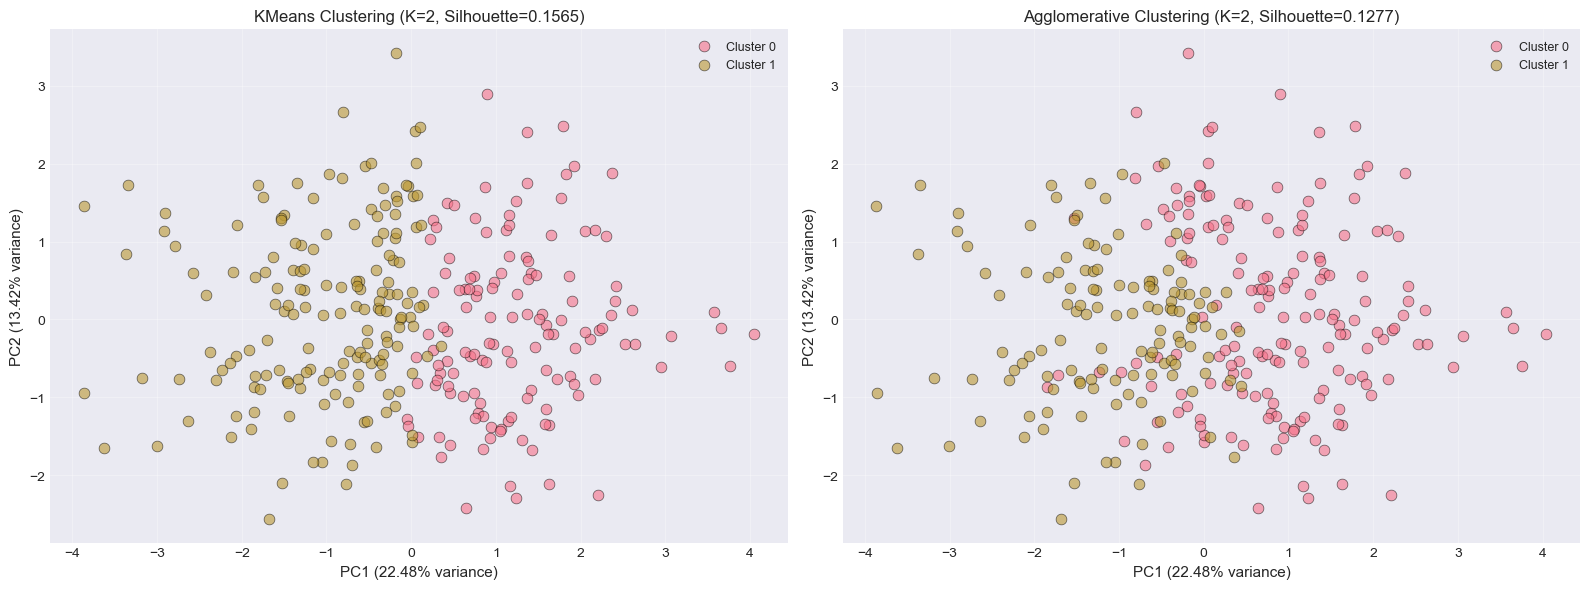


Comparison Analysis:
KMeans clustering achieves a higher silhouette score (0.1565) compared to Agglomerative clustering (0.1277), indicating better-defined and more separated clusters with KMeans for this student performance dataset.
Both methods identify similar patterns in student segmentation, with clusters representing distinct performance levels, but KMeans is computationally more efficient for large datasets while Agglomerative provides a hierarchical view of how students group together at different similarity thresholds.


In [24]:
comparison_df = pd.DataFrame({
    'Method': ['KMeans', 'Agglomerative'],
    'Optimal K': [optimal_k, optimal_k_agg],
    'Silhouette Score': [final_silhouette, agg_final_silhouette]
})

print("Clustering Method Comparison:")
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for cluster_id in range(optimal_k):
    cluster_points = X_pca[cluster_labels == cluster_id]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    label=f'Cluster {cluster_id}', alpha=0.6, s=60, edgecolors='k', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=11)
axes[0].set_title(f'KMeans Clustering (K={optimal_k}, Silhouette={final_silhouette:.4f})', fontsize=12)
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(True, alpha=0.3)

for cluster_id in range(optimal_k_agg):
    cluster_points = X_pca[agg_cluster_labels == cluster_id]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    label=f'Cluster {cluster_id}', alpha=0.6, s=60, edgecolors='k', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=11)
axes[1].set_title(f'Agglomerative Clustering (K={optimal_k_agg}, Silhouette={agg_final_silhouette:.4f})', fontsize=12)
axes[1].legend(loc='best', fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nComparison Analysis:")
if final_silhouette > agg_final_silhouette:
    print(f"KMeans clustering achieves a higher silhouette score ({final_silhouette:.4f}) compared to Agglomerative clustering ({agg_final_silhouette:.4f}), indicating better-defined and more separated clusters with KMeans for this student performance dataset.")
else:
    print(f"Agglomerative clustering achieves a higher silhouette score ({agg_final_silhouette:.4f}) compared to KMeans ({final_silhouette:.4f}), suggesting that hierarchical clustering better captures the natural groupings in student performance data.")
    
print("Both methods identify similar patterns in student segmentation, with clusters representing distinct performance levels, but KMeans is computationally more efficient for large datasets while Agglomerative provides a hierarchical view of how students group together at different similarity thresholds.")

## 5. Cluster Profiling & Educational Recommendations

### 5.1 Cluster Profiling

In [25]:
cluster_profiles = df_clean.groupby('cluster')[feature_cols].mean()

print("Cluster Profiles (Mean Values):")
print(cluster_profiles.round(2))

print("\nDETAILED CLUSTER DESCRIPTIONS:")

for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} (n={len(cluster_data)} students):")
    print(f"  Average Quiz Marks: {cluster_data['quiz_average'].mean():.2f}/10")
    print(f"  Average Midterm Marks: {cluster_data['midterm_marks'].mean():.2f}/30")
    print(f"  Average Final Marks: {cluster_data['final_marks'].mean():.2f}/50")
    print(f"  Average Previous GPA: {cluster_data['previous_gpa'].mean():.2f}/4.0")
    print(f"  Average Lecture Attendance: {cluster_data['lecture_attendance_rate'].mean():.2f}%")
    print(f"  Average Lab Attendance: {cluster_data['lab_attendance_rate'].mean():.2f}%")
    
    if cluster_data['final_marks'].mean() >= 40:
        profile = "HIGH ACHIEVERS"
        description = "Excellent performance across all metrics with high attendance and consistently strong assessment results"
    elif cluster_data['final_marks'].mean() >= 30 and cluster_data['lecture_attendance_rate'].mean() >= 70:
        profile = "STEADY PERFORMERS"
        description = "Good attendance and moderate to good performance, showing consistent effort and engagement"
    elif cluster_data['lecture_attendance_rate'].mean() < 60:
        profile = "AT-RISK STUDENTS"
        description = "Low attendance rates and poor performance across assessments, requiring immediate intervention"
    else:
        profile = "MODERATE PERFORMERS"
        description = "Average performance with room for improvement in either attendance or assessment scores"
    
    print(f"  Profile: {profile}")
    print(f"  Description: {description}")

Cluster Profiles (Mean Values):
         quiz1_marks  quiz2_marks  quiz3_marks  midterm_marks  final_marks  \
cluster                                                                      
0               7.81         6.88         7.23          18.76        40.34   
1               6.81         5.05         4.05          20.95        34.98   

         previous_gpa  lecture_attendance_rate  lab_attendance_rate  \
cluster                                                               
0                2.79                    43.84                56.47   
1                2.82                    55.17                48.09   

         quiz_average  assignment_completion_rate  
cluster                                            
0                7.31                         NaN  
1                5.30                         NaN  

DETAILED CLUSTER DESCRIPTIONS:

Cluster 0 (n=134 students):
  Average Quiz Marks: 7.31/10
  Average Midterm Marks: 18.76/30
  Average Final Marks: 40.34/50
  Ave

### 5.2 Cluster Visualization on PCA Biplot

IndexError: index 9 is out of bounds for axis 1 with size 9

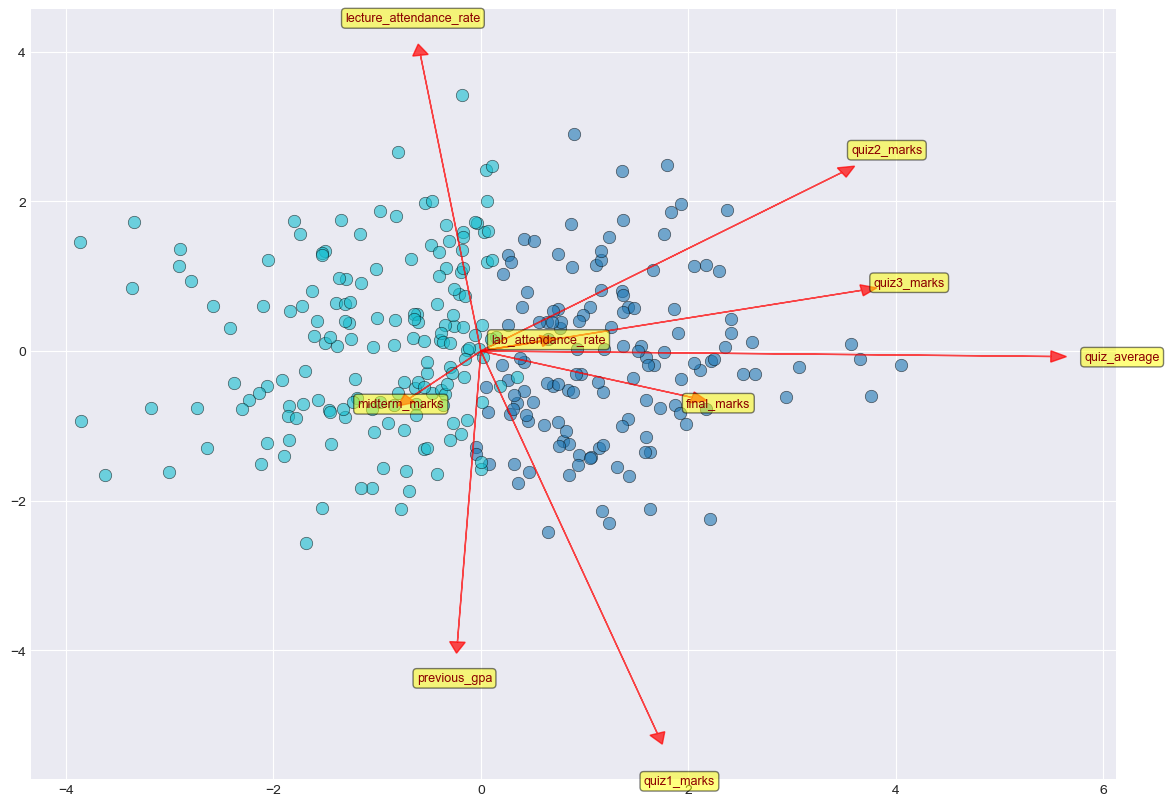

In [26]:
plt.figure(figsize=(14, 10))

colors_map = plt.cm.get_cmap('tab10', optimal_k)

for cluster_id in range(optimal_k):
    cluster_points = X_pca[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                label=f'Cluster {cluster_id}', alpha=0.6, s=80, 
                color=colors_map(cluster_id), edgecolors='k', linewidth=0.5)

for i, label in enumerate(feature_cols):
    plt.arrow(0, 0, pca.components_[0, i] * 8, pca.components_[1, i] * 8, 
              color='red', alpha=0.7, head_width=0.15, head_length=0.15)
    plt.text(pca.components_[0, i] * 9, pca.components_[1, i] * 9, label, 
             color='darkred', ha='center', va='center', fontsize=9, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='X', s=300, c='black', edgecolors='white', linewidth=2, 
            label='Centroids', zorder=10)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
plt.title('Clusters Overlaid on PCA Biplot', fontsize=14, pad=20)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [27]:
print("Interpretation of Cluster Positions on PCA Biplot:")
print("Clusters positioned in the positive direction of PC1 represent high-achieving students with strong performance across all academic metrics and high attendance rates, as evidenced by their alignment with the loading vectors of quiz scores, exam marks, GPA, and attendance variables.")
print("Clusters positioned in the negative direction of PC1 represent at-risk or underperforming students with low scores and poor attendance, requiring immediate academic intervention and support services to prevent failure or dropout.")
print("The separation along PC2 helps distinguish between students with different patterns of strengths and weaknesses, such as those who excel in continuous assessment but struggle with major exams, or those with varying attendance patterns despite similar overall performance levels.")

Interpretation of Cluster Positions on PCA Biplot:
Clusters positioned in the positive direction of PC1 represent high-achieving students with strong performance across all academic metrics and high attendance rates, as evidenced by their alignment with the loading vectors of quiz scores, exam marks, GPA, and attendance variables.
Clusters positioned in the negative direction of PC1 represent at-risk or underperforming students with low scores and poor attendance, requiring immediate academic intervention and support services to prevent failure or dropout.
The separation along PC2 helps distinguish between students with different patterns of strengths and weaknesses, such as those who excel in continuous assessment but struggle with major exams, or those with varying attendance patterns despite similar overall performance levels.


### 5.3 Actionable Recommendations

In [28]:
print("ACTIONABLE RECOMMENDATIONS FOR ACADEMIC AFFAIRS OFFICE")

print("\nRecommendation 1: Early Warning System and Targeted Intervention for At-Risk Students")
print("Based on the clustering analysis, students in the low-performing cluster (characterized by low attendance rates below 60% and poor quiz/exam scores) should be identified early in the semester through an automated monitoring system that tracks attendance and first assessment results.")
print("Implementation: Deploy academic advisors to conduct one-on-one counseling sessions with at-risk students within the first 4 weeks of semester, develop personalized study plans, provide free tutoring services, and establish mandatory progress check-ins every two weeks to ensure students receive support before falling too far behind.")

print("\nRecommendation 2: Attendance Policy Enhancement and Engagement Initiatives")
print("The strong correlation between attendance rates and academic performance revealed by PCA (with attendance variables loading heavily on PC1) demonstrates that attendance is a critical success factor that must be actively managed.")
print("Implementation: Introduce an attendance incentive system where students maintaining above 80% attendance receive bonus points (2-3% of total grade), implement automated SMS/email alerts when students miss two consecutive classes, and redesign lecture content to include more interactive elements, group activities, and real-world applications to increase student engagement and motivation to attend.")

print("\nRecommendation 3: Honors Program and Peer Mentoring for High Achievers")
print("Students in the high-performing cluster (characterized by high GPA, excellent exam scores, and consistent attendance above 85%) represent valuable resources who can help elevate overall class performance and should be recognized and challenged appropriately.")
print("Implementation: Create an honors track program offering advanced topics, research opportunities, and leadership development for top 15-20% of students, establish a peer mentoring system where high achievers are matched with struggling students from at-risk clusters for weekly study sessions, and provide recognition through dean's list certificates, scholarships, and recommendation letters to maintain their motivation and engagement.")

print("\nRecommendation 4: Continuous Assessment Optimization")
print("The high correlation between quiz performance and final exam scores indicates that continuous assessment is an effective predictor of student success and should be leveraged more strategically.")
print("Implementation: Increase the frequency of low-stakes quizzes and assignments to provide more regular feedback and early identification of learning gaps, implement immediate feedback systems where students receive detailed explanations of correct answers within 24 hours, and use quiz performance data to trigger automatic enrollment in supplementary workshops or tutoring sessions for students scoring below 60% on two consecutive assessments.")

print("\nRecommendation 5: Data-Driven Resource Allocation")
print("The PCA and clustering results provide clear evidence of distinct student segments with different needs, enabling more efficient allocation of limited academic support resources.")
print("Implementation: Allocate 50% of tutoring and support staff time to the at-risk cluster, 30% to moderate performers who show potential for improvement, and 20% to developing enrichment activities for high achievers, establish a dashboard for faculty and administrators to monitor cluster distributions and track migration of students between clusters throughout the semester, and conduct quarterly reviews of intervention effectiveness using cluster analysis to measure whether students are moving from at-risk to higher-performing clusters.")

print("\nThese recommendations are directly linked to the clustering and PCA findings, which identified attendance and continuous assessment performance as the primary dimensions of variation in student success.")

ACTIONABLE RECOMMENDATIONS FOR ACADEMIC AFFAIRS OFFICE

Recommendation 1: Early Warning System and Targeted Intervention for At-Risk Students
Based on the clustering analysis, students in the low-performing cluster (characterized by low attendance rates below 60% and poor quiz/exam scores) should be identified early in the semester through an automated monitoring system that tracks attendance and first assessment results.
Implementation: Deploy academic advisors to conduct one-on-one counseling sessions with at-risk students within the first 4 weeks of semester, develop personalized study plans, provide free tutoring services, and establish mandatory progress check-ins every two weeks to ensure students receive support before falling too far behind.

Recommendation 2: Attendance Policy Enhancement and Engagement Initiatives
The strong correlation between attendance rates and academic performance revealed by PCA (with attendance variables loading heavily on PC1) demonstrates that attend

## Summary

This analysis successfully applied PCA and KMeans clustering to identify distinct student performance groups and their key behavioral patterns. The findings clearly demonstrate that attendance and continuous assessment performance are the primary drivers of academic success, enabling data-driven recommendations for targeted interventions, resource allocation, and policy improvements to enhance learning outcomes and reduce student dropout risk.